In [63]:
import urllib.request as req
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd
from obspy import UTCDateTime
from glob import glob
import numpy as np

In [6]:
### "Cookie"需要每次更換
url_header={"sec-ch-ua-mobile": "?0",
"sec-ch-ua-platform": "Linux",
"sec-fetch-dest": "empty",
"sec-fetch-mode": "no-ct.csvors",
"sec-fetch-site": "same-origin",
"user-agent":"Mozilla/5.0 (X11; Fedora; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"
           }

In [5]:
def get_url (time):
        
    url=f"https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain"+\
        f"&station=C0AC70&stname=%25E4%25BF%25A1%25E7%25BE%25A9&datepicker={time}"
         
    return url
    
 

In [4]:
def get_rain_data(time1):
    """
    tr.select('td'): 選tr底下的td子節點標籤
    """
    csv_name=f"{time1}.csv"
    url=get_url(time=time1)
    reqst=requests.get(url,headers=url_header)
    soup = BeautifulSoup(reqst.text,'html.parser') # 轉成網頁格式
    xlist=[['date','precp']]
    for tr in soup.find_all('tr'):
        try:
            xlist.append([f"{time1}-{tr.select('td')[0].string.zfill(2)}",tr.select('td')[21].string.split()[0]])
        except:
            continue
    df=pd.DataFrame(xlist)
    df.to_csv(csv_name, sep=',',mode='w',header=None,index=None)
    

In [8]:
### MAIN
for i in range(1,12):
    time1=f"2021-{str(i).zfill(2)}"
    print(time1)
    get_rain_data(time1)
    time.sleep(1)

2021-01
2021-02
2021-03
2021-04
2021-05
2021-06
2021-07
2021-08
2021-09
2021-10
2021-11


In [30]:
### 多個CSV 合併
files = glob('*.csv')
df = pd.concat(
    (pd.read_csv(file, 
                 usecols=['date','precp'], 
                 dtype={ 'date': 'object' , 'precp':'object'}) for file in files), 
    ignore_index=True)

In [77]:
ts=df['date'] = pd.to_datetime(df['date'])
df['precp']=pd.to_numeric(df['precp'], errors='coerce')
df=df.sort_values(by='date')
df.to_csv('rainfall_2021.csv', sep=',',mode='w',header=None,index=None)

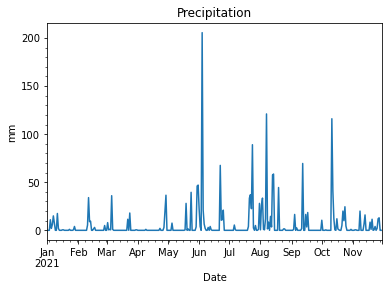

In [76]:
ax = df.plot(x='date',y='precp',
             title="Precipitation",xlabel="Date",ylabel="mm",
             legend=False)
xtick = pd.date_range(start=ts.min(), end=ts.max(), freq='W' )
ax.set_xticks( xtick, minor=True )
ax.set_yticks( [y for y in np.arange(0,200,10)], minor=True )
fig = ax.get_figure()
fig.savefig('rainfall_2021.png',format='png',dpi=300)

In [58]:
ts.min()

Timestamp('2021-01-01 00:00:00')